# Potential Step Problem

In [1]:
import numpy as np
import numpy.linalg as npLA
import scipy.linalg as spLA
import matplotlib.pyplot as plt

In [2]:
from fn_TDSE_solve import TDSE_time_evolution

In [3]:
hbar, m = 1, 1

def gausswv(pr, X):
    x1, sig, k0 = pr
    E = (hbar**2/(2*m))*(k0**2 + 1/(2*sig**2))
    a = 1/((2*np.pi)**0.5 *sig)**0.5
    b = -1/(4*sig**2)
    Nx = len(X)
    psigs = [0 for xi in range(Nx)]
    for xi in range(Nx):
        gswv = a*np.exp(b*(X[xi]-x1)**2)
        if gswv < max(abs(X))*1e-10:
            gswv = 0
        gswv *= complex(np.cos(k0*X[xi]), np.sin(k0*X[xi]))
        psigs[xi] = gswv
    return E, psigs

In [4]:
def pot_step(pr, X):
    V0 = pr
    Nx = len(X)
    V = [0 for i in range(Nx)]
    V[int(Nx/2):] = [V0 for i in range(int(Nx/2))]
    return V

X = np.linspace(0, 50, 100)
sig = 1.5
x1, k0 = 15, 1.5*np.pi
V0 = 5
pr = [hbar, m]
prwv = [x1, sig, k0]
prpt = V0
iters_solve, T_max, pause_time = 3, 30, 0.01

Ts, E, PSIR, PSII, PSIMD2 = TDSE_time_evolution(pr, gausswv, prwv, pot_step, prpt, X, 
                iters_solve, T_max, pause_time, method_='LU_solve_def', return_=True)

Energy=11.214416062336639, reduced energy=10.992193840114417, time=19.936452557473046


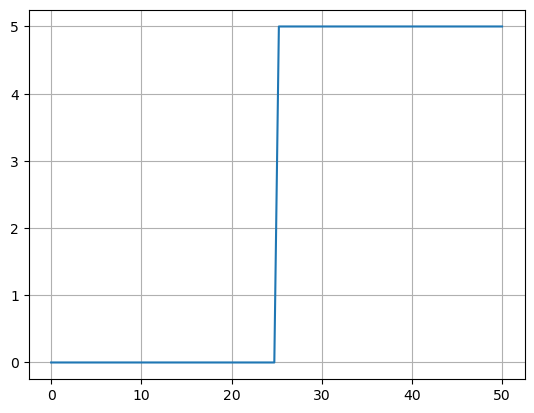

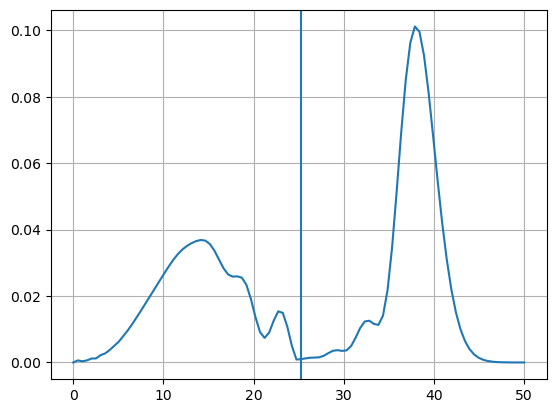

In [5]:
# index: near 40
ti = 42
Nx = len(X)
x0, xN = X[0], X[Nx-1]
bnd1 = int(Nx/2)
t, psi2 = Ts[ti], PSIMD2[ti]
E1 = E - hbar**2/(2*m*sig**2)
print(f'Energy={E}, reduced energy={E1}, time={t}')
plt.plot(X, pot_step(prpt, X))
plt.grid()
plt.show()
plt.plot(X, psi2)
plt.axvline(X[bnd1])
plt.grid()
plt.show()

In [6]:
psi21, psi22 = psi2[:bnd1], psi2[bnd1:]
dx = (xN-x0)/Nx
prob_total = np.sum(psi2*dx)
prob1, prob2 = np.sum(psi21*dx), np.sum(psi22*dx)
print(prob_total, prob_total==prob1+prob2)
Rplot, Tplot = prob1/prob_total, prob2
print(Rplot+Tplot)
print(f'Calculated values: R={Rplot} and T={Tplot}')
Kp = np.sqrt(1-V0/E1)
Rexact = (1-Kp)**2/(1+Kp)**2
print(f'Analytical values: R={Rexact}, T={1-Rexact}')

0.9899999999999798 False
0.9944292186112168
Calculated values: R=0.44292186112281884 and T=0.551507357488398
Analytical values: R=0.02265906435242474, T=0.9773409356475753


Thus, the attempt goes unsuccessful here.